# Libraries

In [1179]:
import pandas as pd
import numpy as np
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import StratifiedKFold

# Loading the DataSet

https://www.kaggle.com/uditg6/smelly-mushrooms-bad-adaboost-100/data

In [1180]:
mushrooms = pd.read_csv("mushrooms.csv")
balanced_dataset= mushrooms.copy()
balanced_dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


# Inspecting the Data

In [1181]:
p=(balanced_dataset['class'].value_counts()['p'])/(len(balanced_dataset))*100
print('percentage of class p: ',p)
e=balanced_dataset['class'].value_counts()['e']/(len(balanced_dataset))*100
print('percentage of class e: ',e)

percentage of class p:  48.20285573609059
percentage of class e:  51.7971442639094


Initially the dataset is balanced. i.e. The target has almost equal percentage of both classes, p and e.

<AxesSubplot:xlabel='class', ylabel='count'>

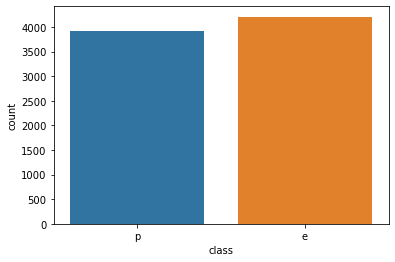

In [1182]:
sns.countplot(x="class", data=balanced_dataset)

In [1183]:
balanced_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

There are no numerical features,all the columns contains categorical values.

In [1184]:
balanced_dataset.shape

(8124, 23)

DataSet has 23 columns and 8124 rows.



In [1185]:
print('Null Values in the dataset: ',balanced_dataset.isnull().sum().sum())

Null Values in the dataset:  0


No column contains the null values.

In [1186]:
print('Duplicates in the dataset: ', balanced_dataset.duplicated().sum())

Duplicates in the dataset:  0


No duplicates exists in the dataset.

# Visualizing the Data

Displaying the distribution of features among both classes in terms of percentage.
https://medium.com/swlh/how-to-create-percentage-plots-for-visualizing-your-data-in-python-f0d894d7c7bb

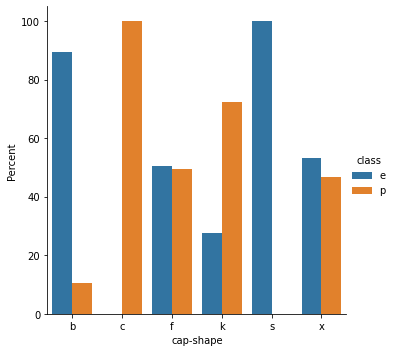

In [1187]:
df_temp = balanced_dataset.groupby('cap-shape')['class'].value_counts(normalize=True)
df_temp = df_temp.mul(100).rename('Percent').reset_index()
sns.catplot(x='cap-shape', y='Percent', hue='class', kind='bar', data=df_temp)

Insight from above graph: Conical-shaped(c) mushrooms are always poisonous while sunken(s) shaped mushrooms are always edible.

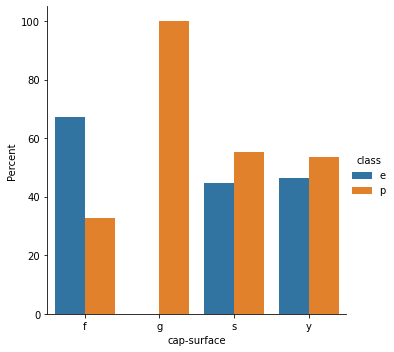

In [1188]:
df_temp = balanced_dataset.groupby('cap-surface')['class'].value_counts(normalize=True)
df_temp = df_temp.mul(100).rename('Percent').reset_index()
sns.catplot(x='cap-surface', y='Percent', hue='class', kind='bar', data=df_temp)

Insight: Grooves(g) cap-surfaced mushrooms are always poisonous.

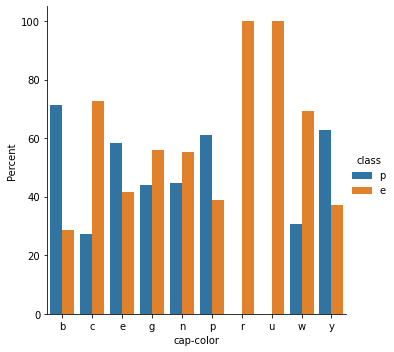

In [1189]:
df_temp = balanced_dataset.groupby('cap-color')['class'].value_counts(normalize=True)
df_temp = df_temp.mul(100).rename('Percent').reset_index()
sns.catplot(x='cap-color', y='Percent', hue='class', kind='bar', data=df_temp)

Insight: Green(r) and purple(u) mushrooms are always edible mushrooms.

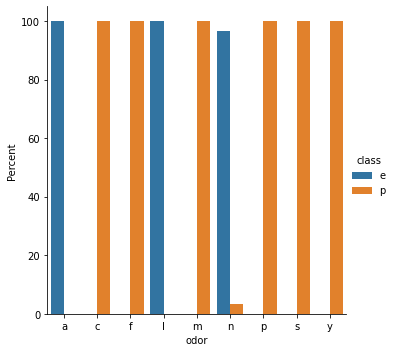

In [1190]:
df_temp = balanced_dataset.groupby('odor')['class'].value_counts(normalize=True)
df_temp = df_temp.mul(100).rename('Percent').reset_index()
sns.catplot(x='odor', y='Percent', hue='class', kind='bar', data=df_temp)

Insight: Almond(a) and Anise(l) odourded mushrooms are always edible while cresosote(c), foul(f), musty(m), pungent(p), spicy(s) and fishy(y) odourded mushrooms are always poisonous.

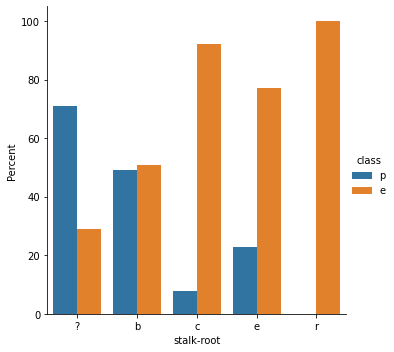

In [1191]:
df_temp = balanced_dataset.groupby('stalk-root')['class'].value_counts(normalize=True)
df_temp = df_temp.mul(100).rename('Percent').reset_index()
sns.catplot(x='stalk-root', y='Percent', hue='class', kind='bar', data=df_temp)

Insight: Rooted(r) mushrooms are always edible.

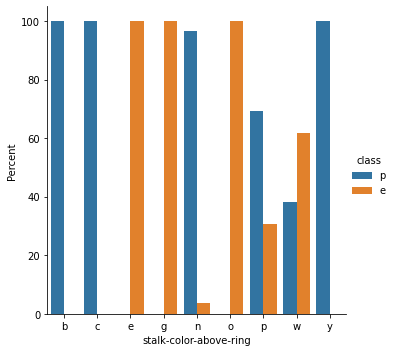

In [1192]:
df_temp = balanced_dataset.groupby('stalk-color-above-ring')['class'].value_counts(normalize=True)
df_temp = df_temp.mul(100).rename('Percent').reset_index()
sns.catplot(x='stalk-color-above-ring', y='Percent', hue='class', kind='bar', data=df_temp)

Insight: Mushrooms having stalk-color-above-ring buff(b), cinnamon(c) and yellow(y) are always poisonous while mushrooms having stalk-color-above-ring red(e), grey(g) and orange(o) are always edible.

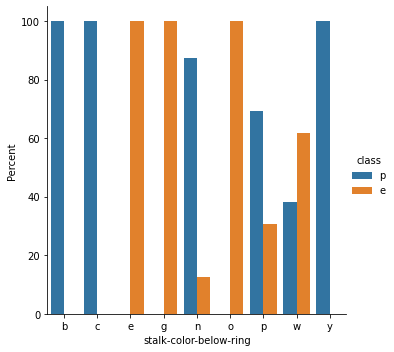

In [1193]:
df_temp = balanced_dataset.groupby('stalk-color-below-ring')['class'].value_counts(normalize=True)
df_temp = df_temp.mul(100).rename('Percent').reset_index()
sns.catplot(x='stalk-color-below-ring', y='Percent', hue='class', kind='bar', data=df_temp)

Insight: Mushrooms having stalk-color-below-ring buff(b), cinnamon(c) and yellow(y) are always poisonous while mushrooms having stalk-color-below-ring red(e), grey(g) and orange(o) are always edible.

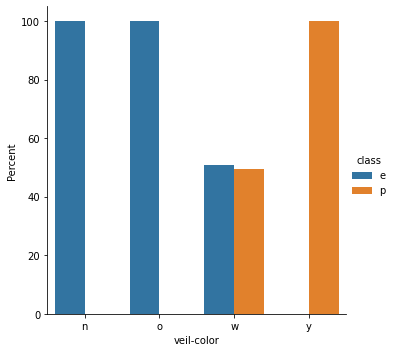

In [1194]:
df_temp = balanced_dataset.groupby('veil-color')['class'].value_counts(normalize=True)
df_temp = df_temp.mul(100).rename('Percent').reset_index()
sns.catplot(x='veil-color', y='Percent', hue='class', kind='bar', data=df_temp)

Insight: Mushrooms having veil color brown(n) and orange(o) are always edible while mushrooms with yellow(y)-colored veils are always poisonous.

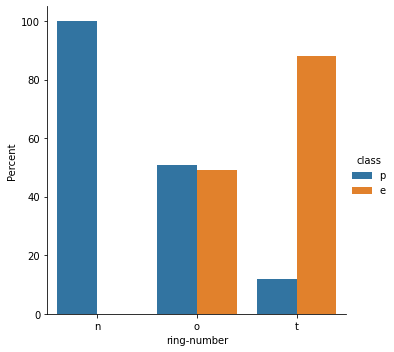

In [1195]:
df_temp = balanced_dataset.groupby('ring-number')['class'].value_counts(normalize=True)
df_temp = df_temp.mul(100).rename('Percent').reset_index()
sns.catplot(x='ring-number', y='Percent', hue='class', kind='bar', data=df_temp)

Insight: Mushrooms without rings(n) are always poisonous.

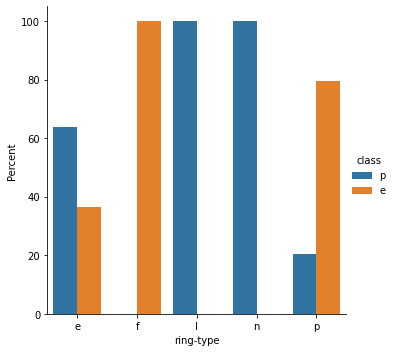

In [1196]:
df_temp = balanced_dataset.groupby('ring-type')['class'].value_counts(normalize=True)
df_temp = df_temp.mul(100).rename('Percent').reset_index()
sns.catplot(x='ring-type', y='Percent', hue='class', kind='bar', data=df_temp)

Insight: Large(l) and none(n) ring-typed mushrooms are always poisonous while rings with flaring(f) type are edibles. 

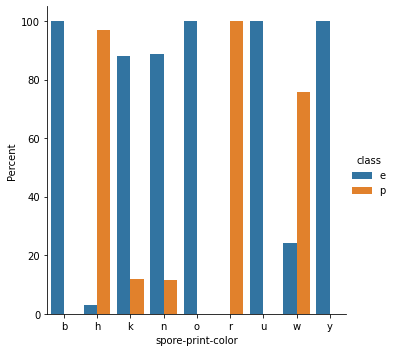

In [1197]:
df_temp = balanced_dataset.groupby('spore-print-color')['class'].value_counts(normalize=True)
df_temp = df_temp.mul(100).rename('Percent').reset_index()
sns.catplot(x='spore-print-color', y='Percent', hue='class', kind='bar', data=df_temp)

Insight: Green(r) spore-printed mushrooms are always poisonous while buff(b), orange(o), purple(u), and yellow(y) are edibles.

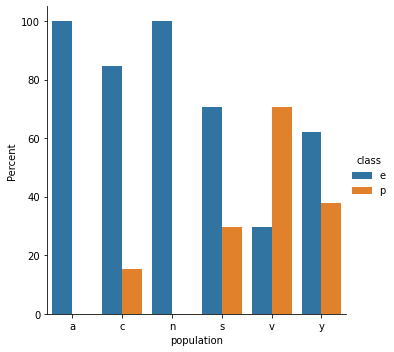

In [1198]:
df_temp = balanced_dataset.groupby('population')['class'].value_counts(normalize=True)
df_temp = df_temp.mul(100).rename('Percent').reset_index()
sns.catplot(x='population', y='Percent', hue='class', kind='bar', data=df_temp)

Insight: Abundantly(a) and numerously(n) populated mushrooms are always edible mushrooms.

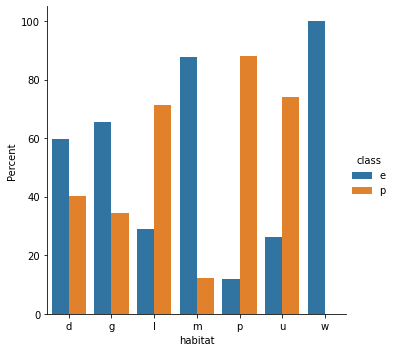

In [1199]:
df_temp = balanced_dataset.groupby('habitat')['class'].value_counts(normalize=True)
df_temp = df_temp.mul(100).rename('Percent').reset_index()
sns.catplot(x='habitat', y='Percent', hue='class', kind='bar', data=df_temp)

Insight: Mushrooms that exist in waste(w) are always edible.

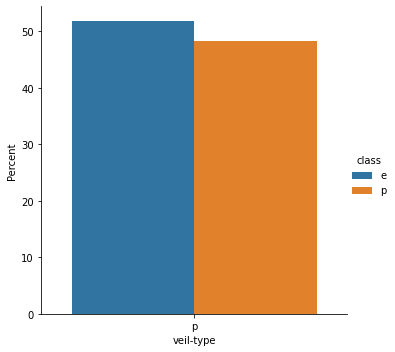

In [1200]:
df_temp = balanced_dataset.groupby('veil-type')['class'].value_counts(normalize=True)
df_temp = df_temp.mul(100).rename('Percent').reset_index()
sns.catplot(x='veil-type', y='Percent', hue='class', kind='bar', data=df_temp)

Veil type has only one unique value p which is predicting edible and poisonous almost same number of times, so this feature is not much informative and we can drop it.

# Data pre-processing

In [1201]:
features=['cap-shape','cap-surface','cap-color','bruises','odor','gill-attachment','gill-spacing','gill-size','gill-color','stalk-shape','stalk-root','stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring','veil-type','veil-color','ring-number','ring-type','spore-print-color','population','habitat']
unique_values=0
for i in range(len(features)):
    unique_values=unique_values+len(balanced_dataset[features[i]].unique())
print('Total Unique Values among all features: ',unique_values)

Total Unique Values among all features:  117


On observing the features, it can be seen that the features contains nominal values. i.e. they cannot be ranked so we cannot perform ordinal encoding.Therefore, we are going to perform the one hot encoding.

In [1202]:
X_balanced_dataset = pd.get_dummies(balanced_dataset[features]) # get dummies
X_balanced_dataset.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


We will be performing label encoding on the target column to convert the values to numerical form.

In [1203]:
Y_balanced_dataset=balanced_dataset['class'].copy()
encoder=LabelEncoder()
Y_balanced_dataset=encoder.fit_transform(Y_balanced_dataset)
Y_balanced_dataset
#poisonous=1, edible=0

array([1, 0, 0, ..., 0, 1, 0])

Now we need to make a copy by concatenating features and labels both into a single dataframe, so that we can use it while creating the surrogates.

In [1204]:
balanced_dataset=X_balanced_dataset.copy()
balanced_dataset['class']=Y_balanced_dataset.tolist()
balanced_dataset.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,class
0,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [1205]:
print('Duplicates in the dataset: ', balanced_dataset.duplicated().sum())

Duplicates in the dataset:  0


# Creating a Surrogate achieving low Imbalance

In [1206]:
e=balanced_dataset[balanced_dataset['class'] == 0] 
p=balanced_dataset[balanced_dataset['class'] == 1] #majority class poisonous represented by 1
e= e.sample(replace=False,  n=2109, random_state=1) #minority class edible represented by 0
Imbalanced_dataset_low=pd.concat([p, e])
Imbalanced_dataset_low.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,class
0,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
3,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
8,0,0,0,0,0,1,0,0,0,1,...,1,0,0,1,0,0,0,0,0,1
13,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,1,0,1
17,0,0,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [1207]:
p=(Imbalanced_dataset_low['class'].value_counts()[1])/(len(Imbalanced_dataset_low))*100
print('percentage of class p: ',round(p))
e=Imbalanced_dataset_low['class'].value_counts()[0]/(len(Imbalanced_dataset_low))*100
print('percentage of class e: ',round(e))

percentage of class p:  65
percentage of class e:  35


<AxesSubplot:xlabel='class', ylabel='count'>

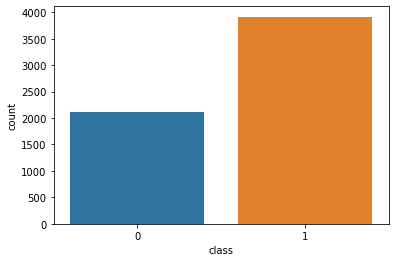

In [1208]:
sns.countplot(x="class", data=Imbalanced_dataset_low)

In [1209]:
Imbalanced_dataset_low.shape

(6025, 118)

Low Surrogate dataset has 6025 rows and same number of columns as in balanced dataset.

In [1210]:
print('Duplicates in the dataset: ', Imbalanced_dataset_low.duplicated().sum())

Duplicates in the dataset:  0


Duplicates are checked to ensure that there was no duplication while randomly sub-sampling from the e class.

In [1211]:
X_Imbalanced_dataset_low=Imbalanced_dataset_low.drop(columns=['class'])
Y_Imbalanced_dataset_low=Imbalanced_dataset_low['class'].copy()

Features and target label are separated in the above piece of code.

# Creating a Surrogate achieving Medium Imbalance

In [1212]:
p=balanced_dataset[balanced_dataset['class'] == 1] #majority class poisonous represented by 1
e=balanced_dataset[balanced_dataset['class'] == 0] #minority class edible represented by 0
e= e.sample(replace=False,  n=1307, random_state=1) 
Imbalanced_dataset_med=pd.concat([p, e])
Imbalanced_dataset_med.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,class
0,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
3,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
8,0,0,0,0,0,1,0,0,0,1,...,1,0,0,1,0,0,0,0,0,1
13,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,1,0,1
17,0,0,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [1213]:
p=(Imbalanced_dataset_med['class'].value_counts()[1])/(len(Imbalanced_dataset_med))*100
print('percentage of class p: ',round(p))
e=Imbalanced_dataset_med['class'].value_counts()[0]/(len(Imbalanced_dataset_med))*100
print('percentage of class e: ',round(e))

percentage of class p:  75
percentage of class e:  25


<AxesSubplot:xlabel='class', ylabel='count'>

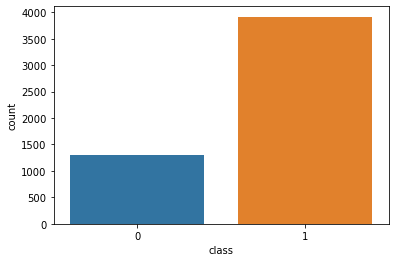

In [1214]:
sns.countplot(x="class", data=Imbalanced_dataset_med)

In [1215]:
Imbalanced_dataset_med.shape

(5223, 118)

Med Surrogate dataset has 5223 rows and same number of columns as in balanced dataset.

In [1216]:
print('Duplicates in the dataset: ', Imbalanced_dataset_med.duplicated().sum())

Duplicates in the dataset:  0


Duplicates are checked to ensure that there was no duplication while randomly sub-sampling from the e class.

In [1217]:
X_Imbalanced_dataset_med=Imbalanced_dataset_med.drop(columns=['class'])
Y_Imbalanced_dataset_med=Imbalanced_dataset_med['class'].copy()

Features and target label are separated in the above piece of code.

# Creating a Surrogate achieving High Imbalance

In [1218]:
p=balanced_dataset[balanced_dataset['class'] == 1] #majority class poisonous represented by 1
e=balanced_dataset[balanced_dataset['class'] == 0] #minority class edible represented by 0
e= e.sample(replace=False,  n=436, random_state=1) 
Imbalanced_dataset_high=pd.concat([p, e])
Imbalanced_dataset_high.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,class
0,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
3,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
8,0,0,0,0,0,1,0,0,0,1,...,1,0,0,1,0,0,0,0,0,1
13,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,1,0,1
17,0,0,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [1219]:
p=(Imbalanced_dataset_high['class'].value_counts()[1])/(len(Imbalanced_dataset_high))*100
print('percentage of class p: ',round(p))
e=Imbalanced_dataset_high['class'].value_counts()[0]/(len(Imbalanced_dataset_high))*100
print('percentage of class e: ',round(e))

percentage of class p:  90
percentage of class e:  10


<AxesSubplot:xlabel='class', ylabel='count'>

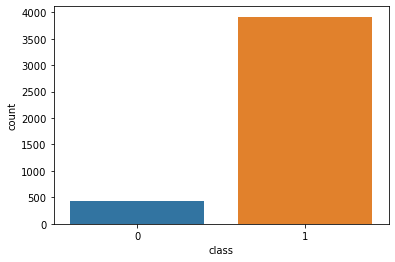

In [1220]:
sns.countplot(x="class", data=Imbalanced_dataset_high)

In [1221]:
Imbalanced_dataset_high.shape

(4352, 118)

Med Surrogate dataset has 4352 rows and same number of columns as in balanced dataset.

In [1222]:
print('Duplicates in the dataset: ', Imbalanced_dataset_high.duplicated().sum())

Duplicates in the dataset:  0


Duplicates are checked to ensure that there was no duplication while randomly sub-sampling from the e class.

In [1223]:
X_Imbalanced_dataset_high=Imbalanced_dataset_high.drop(columns=['class'])
Y_Imbalanced_dataset_high=Imbalanced_dataset_high['class'].copy()

Features and target label are separated in the above piece of code.